In [1]:
!pip install pyrosm

  Using cached pyrosm-0.6.2-cp311-cp311-macosx_11_0_arm64.whl
  Obtaining dependency information for python-rapidjson from https://files.pythonhosted.org/packages/7a/68/d65ae2af413c5159fedcb7ce6fa491437439767e7ff0cbd4efea78395e8b/python_rapidjson-1.20-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached python_rapidjson-1.20-cp311-cp311-macosx_11_0_arm64.whl.metadata (22 kB)
  Using cached cykhash-2.0.1-cp311-cp311-macosx_11_0_arm64.whl
  Using cached pyrobuf-0.9.3-cp311-cp311-macosx_11_0_arm64.whl
  Obtaining dependency information for cython>=0.23 from https://files.pythonhosted.org/packages/43/39/bdbec9142bc46605b54d674bf158a78b191c2b75be527c6dcf3e6dfe90b8/Cython-3.0.11-py2.py3-none-any.whl.metadata
  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
Using cached python_rapidjson-1.20-cp311-cp311-macosx_11_0_arm64.whl (210 kB)
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)


In [2]:
import requests
import zipfile
import io
import os
import pandas as pd
from pyrosm import get_data
from pyrosm.data import sources
from pyrosm import get_data
from pyrosm import OSM

/Users/tinas/anaconda3/envs/group25env/lib/python3.11/site-packages/pyproj/__init__.py:96: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_DATA (PROJ 9.1+) | PROJ_LIB (PROJ<9.1) or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [3]:
url = "https://www.abs.gov.au/census/find-census-data/datapacks/download/2021_GCP_SA2_for_VIC_short-header.zip"
print("Downloading the Victoria DataPack ZIP file...")
basepath = "../data/landing"

os.makedirs(basepath, exist_ok=True)
response = requests.get(url)
if response.status_code == 200:
    print("Download successful!")


    file_path = os.path.join(basepath, "Victoria_DataPack.zip")
    with open(file_path, "wb") as f:
        f.write(response.content)
    print(f"File saved to '{file_path}' successfully!")

    output_dir = os.path.join(basepath, "Victoria_DataPack")
    os.makedirs(output_dir, exist_ok=True)
    
    print("Extracting the ZIP file...")
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    
    print(f"DataPack extracted to '{output_dir}' successfully!")

else:
    print(f"Failed to download the file. Status code: {response.status_code}")

Download successful!
File saved to '../data/landing/Victoria_DataPack.zip' successfully!
Extracting the ZIP file...
DataPack extracted to '../data/landing/Victoria_DataPack' successfully!


### Transport Data 

- Retrieve all the 

In [4]:
base_dir = "../data/landing/gtfs"

# URL for the GTFS zip file
url = "https://data.ptv.vic.gov.au/downloads/gtfs.zip"

# Create the directory if it doesn't exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)
    print(f"Created directory: {base_dir}")

# Path where the main zip file will be saved
main_zip_path = os.path.join(base_dir, "gtfs.zip")

# Download the GTFS zip file
if not os.path.exists(main_zip_path):
    print(f"Downloading {url}...")
    response = requests.get(url)
    with open(main_zip_path, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded and saved {main_zip_path} successfully!")

# Check if the main zip file exists and proceed with extraction
if os.path.exists(main_zip_path):
    print(f"Extracting main zip file: {main_zip_path}")
    
    # Extract the main zip file
    with zipfile.ZipFile(main_zip_path, 'r') as main_zip:
        main_zip.extractall(base_dir)
    
    print(f"Extracted {main_zip_path} successfully!")
    
    # Iterate through extracted files and handle any zip files inside
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        # Check if it is a directory (the unzipped folder)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                # Check if the file is a zip file
                if zipfile.is_zipfile(file_path):
                    print(f"Found nested zip file: {file_path}, extracting...")
                    
                    # Extract the nested zip file
                    with zipfile.ZipFile(file_path, 'r') as nested_zip:
                        nested_zip.extractall(folder_path)
                    
                    print(f"Extracted nested zip file: {file_path} successfully!")
else:
    print(f"No main zip file found at {main_zip_path}")

Extracting main zip file: ../data/landing/gtfs/gtfs.zip
Extracted ../data/landing/gtfs/gtfs.zip successfully!
Found nested zip file: ../data/landing/gtfs/11/google_transit.zip, extracting...
Extracted nested zip file: ../data/landing/gtfs/11/google_transit.zip successfully!
Found nested zip file: ../data/landing/gtfs/7/google_transit.zip, extracting...
Extracted nested zip file: ../data/landing/gtfs/7/google_transit.zip successfully!
Found nested zip file: ../data/landing/gtfs/6/google_transit.zip, extracting...
Extracted nested zip file: ../data/landing/gtfs/6/google_transit.zip successfully!
Found nested zip file: ../data/landing/gtfs/1/google_transit.zip, extracting...
Extracted nested zip file: ../data/landing/gtfs/1/google_transit.zip successfully!
Found nested zip file: ../data/landing/gtfs/10/google_transit.zip, extracting...
Extracted nested zip file: ../data/landing/gtfs/10/google_transit.zip successfully!
Found nested zip file: ../data/landing/gtfs/8/google_transit.zip, extra

In [5]:
ptv = "https://data.ptv.vic.gov.au/downloads/gtfs.zip"  

response = requests.get(ptv)  
if response.status_code == 200:
    print("Download successful!")

    file_path = os.path.join(base_dir, "gtfs.zip")
    with open(file_path, "wb") as f:
        f.write(response.content)
    print(f"File saved to '{file_path}' successfully!")

    output_dir = os.path.join(base_dir, "gtfs")
    os.makedirs(output_dir, exist_ok=True)
    
    print("Extracting the ZIP file...")
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    
    print(f"DataPack extracted to '{output_dir}' successfully!")

else:
    print(f"Failed to download the file. Status code: {response.status_code}")



Download successful!
File saved to '../data/landing/gtfs/gtfs.zip' successfully!
Extracting the ZIP file...
DataPack extracted to '../data/landing/gtfs/gtfs' successfully!


In [7]:

print(sources.available.keys())
print(sources.cities.available)

basepath = "../data/landing"
fp = get_data("Melbourne", directory=basepath)

dict_keys(['africa', 'antarctica', 'asia', 'australia_oceania', 'central_america', 'europe', 'north_america', 'south_america', 'cities', 'subregions'])
['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh',

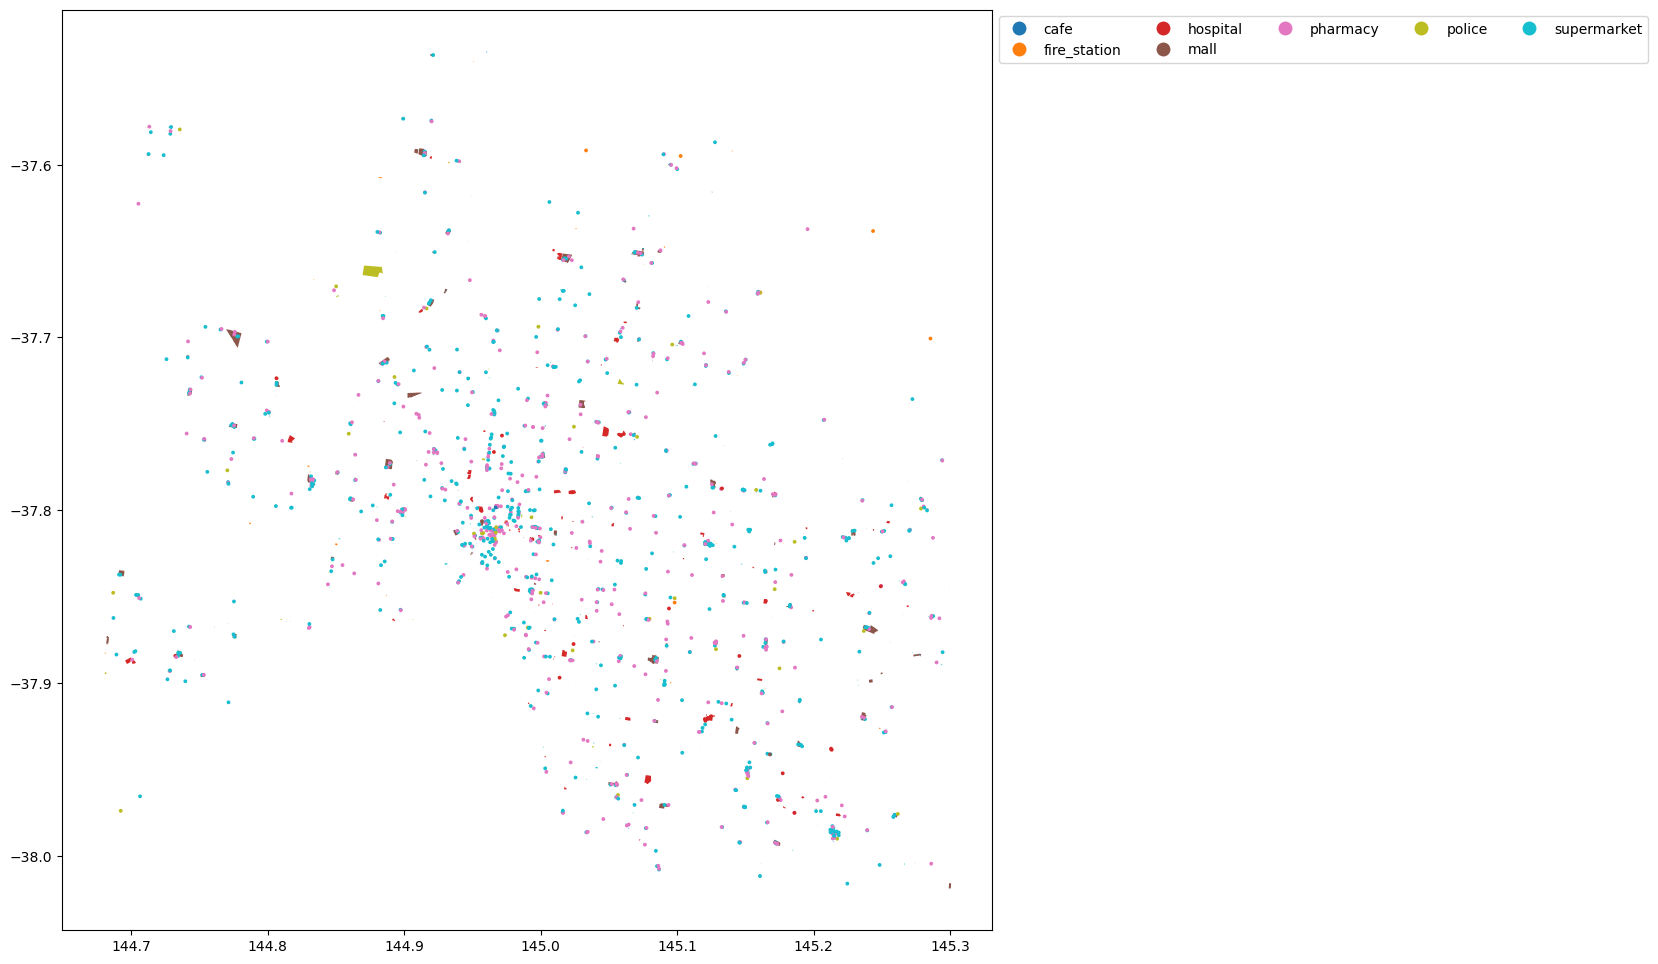

In [9]:
os.makedirs(os.path.dirname("../data/landing/OSM/"), exist_ok=True)
fp = get_data("Melbourne", directory="../data/landing/OSM/")
osm = OSM(fp)
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

custom_filter = {
    'amenity': ['hospital', 'fire_station', 'police', 'pharmacy'],
    'shop': ['mall', 'supermarket'],
    'nature': ['beach', 'scrub']
}

pois = osm.get_pois(custom_filter=custom_filter)

pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot the POIs categorized by 'poi_type'
ax = pois.plot(column='poi_type', markersize=3, figsize=(12, 12), legend=True, 
               legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))


In [ ]:
pois.to_csv("../data/landing/amenities.csv")

In [ ]:
mall = pois.loc[pois['poi_type'] == "mall"]

In [ ]:
mall.to_csv(os.path.join(basepath, "malls_melb.csv"))

In [ ]:
"https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SA2_2021_AUST_SHP_GDA2020.zip"

SA2_shapefile = "https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SA2_2021_AUST_SHP_GDA2020.zip"

basepath = "../data/landing"
response = requests.get(SA2_shapefile)  
if response.status_code == 200:
    print("Download successful!")

    
    file_path = os.path.join(basepath, "SA2_2021_AUST_SHP_GDA2020.zip")
    with open(file_path, "wb") as f:
        f.write(response.content)
    print(f"File saved to '{file_path}' successfully!")

    output_dir = os.path.join(basepath, "SA2_2021_AUST_SHP_GDA2020")
    os.makedirs(output_dir, exist_ok=True)
    
    print("Extracting the ZIP file...")
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    
    print(f"DataPack extracted to '{output_dir}' successfully!")

else:
    print(f"Failed to download the file. Status code: {response.status_code}")



Download successful!
File saved to '../data/landing/SA2_2021_AUST_SHP_GDA2020.zip' successfully!
Extracting the ZIP file...
DataPack extracted to '../data/landing/SA2_2021_AUST_SHP_GDA2020' successfully!


In [ ]:
schoolurl = "https://www.education.vic.gov.au/Documents/about/research/datavic/dv346-schoollocations2023.csv"

response = requests.get(schoolurl)

with open("../data/landing/dv346-schoollocations2023.csv", "wb") as file:
    file.write(response.content)

print("Download complete!")

Download complete!


In [ ]:
url = "https://files.crimestatistics.vic.gov.au/2024-09/Data_Tables_LGA_Recorded_Offences_Year_Ending_June_2024.xlsx"

response = requests.get(url)

file_path = "../data/historical/Data_Tables_LGA_Recorded_Offences_June_2024.xlsx"

with open(file_path, 'wb') as file:
    file.write(response.content)

print(f"File saved to {file_path}")

File saved to ../data/historical/Data_Tables_LGA_Recorded_Offences_June_2024.xlsx


### For Postcode

In [ ]:
url = "https://www.matthewproctor.com/Content/postcodes/australian_postcodes.csv"

file_name = "../data/landing/australian_postcodes.csv"

try:
    response = requests.get(url)
    response.raise_for_status()  #

    with open(file_name, "wb") as file:
        file.write(response.content)

    print(f"File downloaded successfully and saved as '{file_name}'.")

except requests.exceptions.RequestException as e:
    print(f"Failed to download the file. Error: {e}")

File downloaded successfully and saved as '../data/landing/australian_postcodes.csv'.


In [ ]:
postcodes = pd.read_csv("../data/landing/australian_postcodes.csv")
postcodes = postcodes.loc[postcodes["state"] == "VIC"][["postcode","locality","state"]]
postcodes["locality"] = postcodes["locality"].apply(lambda x: x.lower())
postcodes["locality"] = postcodes["locality"].apply(lambda x: x.replace(" ", "-"))
postcodes ["state"] = postcodes["state"].apply(lambda x: x.lower())
postcodes["url"] = postcodes["locality"] + "-" + postcodes["state"] + "-" + postcodes["postcode"].astype(str)

In [ ]:
postcodes["url"].unique()

array(['melbourne-vic-3000', 'melbourne-vic-3001',
       'east-melbourne-vic-3002', ..., 'dandenong-vic-8785',
       'dandenong-south-vic-8785', 'north-pole-vic-9999'], dtype=object)

In [ ]:
suburbs_interested= """Albert-Park
Armadale
Carlton-North
Carlton
Melbourne
Collingwood
Docklands
East-Melbourne
East-St-Kilda
Elwood
Fitzroy
Fitzroy-North
Flemington
North-Melbourne
Port-Melbourne
Prahran
Richmond
South-Melbourne
South-Yarra
Southbank
St-Kilda
Toorak
Balwyn
Blackburn
Box-Hill
Bulleen
Burwood
Camberwell
Canterbury
Chadstone
Clayton
Doncaster-East
East-Hawthorn
Glen-Waverley
Hawthorn
Kew
Mount-Waverley
Nunawading
Vermont
Aspendale
Bentleigh
Brighton
Brighton-East
Carnegie
Caulfield
Cheltenham
Elsternwick
Hampton
Malvern
Malvern-East
Mentone
Murrumbeena
Altona
Footscray
Keilor-East
Melton
Newport
St-Albans
Sunshine
Sydenham
Werribee
West-Footscray
Williamstown
Yarraville
Broadmeadows
Brunswick
Coburg
Craigieburn
East-Brunswick
Essendon
Gladstone-Park
Keilor
Moonee-Ponds
Oak-Park
Pascoe-Vale
Sunbury
West-Brunswick
Bundoora
Eltham
Fairfield
Heidelberg
Ivanhoe
Mill-Park
Northcote
Preston
Reservoir
Thomastown
Thornbury
Whittlesea
Bayswater
Boronia
Croydon
Ferntree-Gully
Ringwood
Rowville
Wantirna
Yarra-Ranges
Berwick
Cranbourne
Dandenong
Dandenong-North
Narre-Warren
Noble-Park
Pakenham
Springvale
Dromana
Frankston
Hastings
Mt-Eliza
Seaford
Belmont-Grovedale
Corio
Geelong
Herne-Hill
Lara
Newtown
North-Geelong
Ballarat
Mount-Clear
Sebastopol
Wendouree
Bendigo
Flora-Hill
Golden-Square
North-Bendigo
Bairnsdale
Benalla
Castlemaine
Echuca
Hamilton
Horsham
Mildura
Moe
Morwell
Ocean-Grove
Portland
Sale
Seymour
Shepparton
Swan-Hill
Torquay
Traralgon
Wanagaratta
Warragul
Warrnambool
Wodonga"""
suburbs_interested = suburbs_interested.split("\n")
suburbs_interested = [x.lower() for x in suburbs_interested]
suburbs_interested

['albert-park',
 'armadale',
 'carlton-north',
 'carlton',
 'melbourne',
 'collingwood',
 'docklands',
 'east-melbourne',
 'east-st-kilda',
 'elwood',
 'fitzroy',
 'fitzroy-north',
 'flemington',
 'north-melbourne',
 'port-melbourne',
 'prahran',
 'richmond',
 'south-melbourne',
 'south-yarra',
 'southbank',
 'st-kilda',
 'toorak',
 'balwyn',
 'blackburn',
 'box-hill',
 'bulleen',
 'burwood',
 'camberwell',
 'canterbury',
 'chadstone',
 'clayton',
 'doncaster-east',
 'east-hawthorn',
 'glen-waverley',
 'hawthorn',
 'kew',
 'mount-waverley',
 'nunawading',
 'vermont',
 'aspendale',
 'bentleigh',
 'brighton',
 'brighton-east',
 'carnegie',
 'caulfield',
 'cheltenham',
 'elsternwick',
 'hampton',
 'malvern',
 'malvern-east',
 'mentone',
 'murrumbeena',
 'altona',
 'footscray',
 'keilor-east',
 'melton',
 'newport',
 'st-albans',
 'sunshine',
 'sydenham',
 'werribee',
 'west-footscray',
 'williamstown',
 'yarraville',
 'broadmeadows',
 'brunswick',
 'coburg',
 'craigieburn',
 'east-brunswi

In [ ]:
postcodes = postcodes.loc[postcodes["locality"].isin(suburbs_interested)]
postcodes.to_csv("../data/landing/url-site.csv")

In [ ]:
len(list(postcodes["url"]))

168